In [1]:
%reset
import numpy as np
import pandas as pd
import pickle
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import  plot_series
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [5]:
#Ouvre le fichier CSV du capteur dont les données sont issues
df = pd.read_csv("C:/Users/patrick.olislaegers/Downloads/b_bed_pressure_5896.csv", sep=',', header=0, names=["value_id", "sensor_id", "timestamp", "value"])

#Transtypage des colonnes
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['value'] = df['value'].astype('int64')

#Selection de la plage de dates à extraire du dataset
df = df[(df['timestamp'] > '2020-03-09') & (df['timestamp'] <= '2020-04-09')]
df = df.set_index('timestamp').asfreq('5min')
df.fillna(method='ffill', inplace=True)

#Suppression des colonnes inutiles pour l'apprentissage
df = df.drop(columns=["sensor_id","value_id"])
print(df.head(100))

                     value
timestamp                 
2020-03-09 00:05:00  640.0
2020-03-09 00:10:00  641.0
2020-03-09 00:15:00  641.0
2020-03-09 00:20:00  642.0
2020-03-09 00:25:00  642.0
...                    ...
2020-03-09 08:00:00  646.0
2020-03-09 08:05:00  646.0
2020-03-09 08:10:00  646.0
2020-03-09 08:15:00  646.0
2020-03-09 08:20:00  639.0

[100 rows x 1 columns]


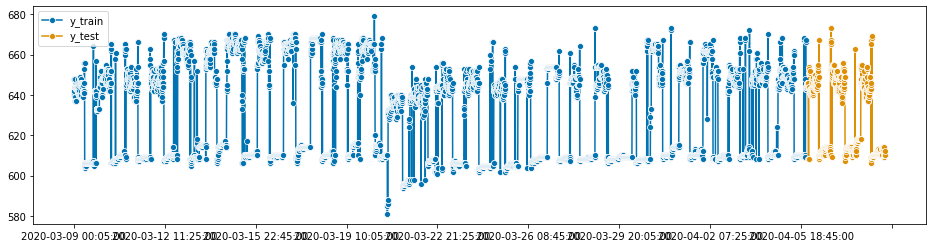

In [6]:
# Slipt test/train des données
y_train, y_test = temporal_train_test_split(df, test_size=3*12*24)
plot_series(y_train, y_test, labels=["y_train", "y_test",]);

                     value
2020-03-09 00:05:00  640.0
2020-03-09 00:10:00  641.0
2020-03-09 00:15:00  641.0
2020-03-09 00:20:00  642.0
2020-03-09 00:25:00  642.0
...                    ...
2020-03-16 23:40:00  610.0
2020-03-16 23:45:00  610.0
2020-03-16 23:50:00  610.0
2020-03-16 23:55:00  610.0
2020-03-17 00:00:00  610.0

[2304 rows x 1 columns]
                     value
2020-03-17 00:05:00  649.0
2020-03-17 00:10:00  649.0
2020-03-17 00:15:00  649.0
2020-03-17 00:20:00  649.0
2020-03-17 00:25:00  652.0
2020-03-17 00:30:00  649.0
2020-03-17 00:35:00  652.0
2020-03-17 00:40:00  651.0
2020-03-17 00:45:00  652.0
2020-03-17 00:50:00  652.0
0.021819989499161325


C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:533: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:543: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\patrick.o

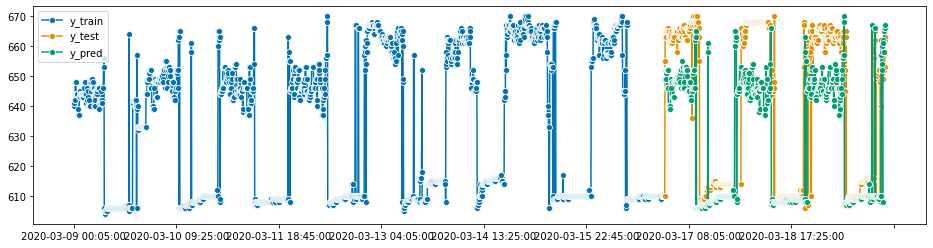

In [4]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=24*12*7)
print(y_train)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
print(y_pred[:10])
#y_pred.fillna(method='ffill', inplace=True)
#y_pred["value"] = y_pred.astype('int64')

# step 3: specifying the evaluation metric
mape = MeanAbsolutePercentageError(symmetric=False)

# step 4: computing the forecast performance
print(mape(y_test, y_pred))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [6]:
#Sauvegarde du modèle avec Pickle
filename = 'model_5896_bed_pressure.pkl'
pickle.dump(forecaster, open(filename, 'wb'))

C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:533: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:543: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\patrick.o

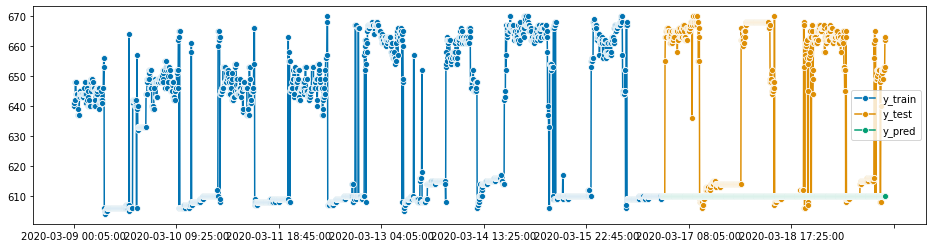

In [6]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA

from sktime.utils.plotting import plot_series


forecaster = AutoARIMA(suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [7]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.arima import AutoARIMA

ensemble = EnsembleForecaster(forecasters = [("tbats", TBATS()),
                                             ("autoarima", AutoARIMA())],                         
                              aggfunc = "min")
ensemble.fit(y_train)
print(ensemble.forecasters_)

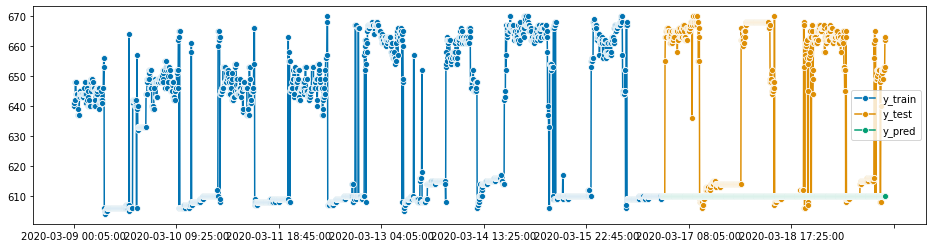

In [9]:
from sktime.datasets import load_airline
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(
    use_box_cox=False,
    use_trend=False,
    use_damped_trend=False,
    sp=24*12*7,
    use_arma_errors=False,
    n_jobs=1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

                     value
2020-03-09 00:05:00  640.0
2020-03-09 00:10:00  641.0
2020-03-09 00:15:00  641.0
2020-03-09 00:20:00  642.0
2020-03-09 00:25:00  642.0
...                    ...
2020-03-16 23:40:00  610.0
2020-03-16 23:45:00  610.0
2020-03-16 23:50:00  610.0
2020-03-16 23:55:00  610.0
2020-03-17 00:00:00  610.0

[2304 rows x 1 columns]
                          value
2020-03-17 00:05:00  635.862581
2020-03-17 00:10:00  635.865178
2020-03-17 00:15:00  635.867774
2020-03-17 00:20:00  635.870370
2020-03-17 00:25:00  635.872966
2020-03-17 00:30:00  635.875562
2020-03-17 00:35:00  635.878158
2020-03-17 00:40:00  635.880754
2020-03-17 00:45:00  635.883350
2020-03-17 00:50:00  635.885946
0.03996080226746657


C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr


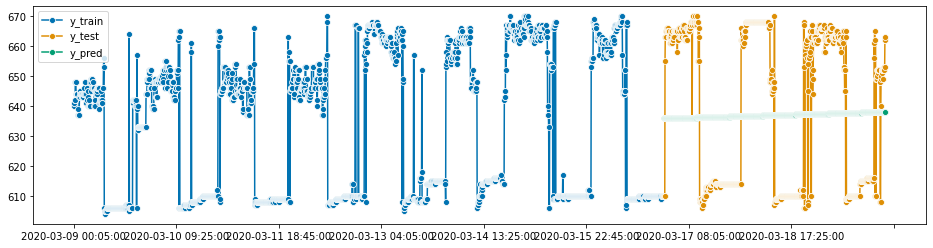

In [14]:
from sktime.forecasting.trend import PolynomialTrendForecaster
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = PolynomialTrendForecaster(degree=1)
print(y_train)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
print(y_pred[:10])
#y_pred.fillna(method='ffill', inplace=True)
#y_pred["value"] = y_pred.astype('int64')

# step 3: specifying the evaluation metric
mape = MeanAbsolutePercentageError(symmetric=False)

# step 4: computing the forecast performance
print(mape(y_test, y_pred))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [7]:
from sktime.forecasting.ets import AutoETS
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = AutoETS(auto=True, n_jobs=-1, sp=24*12*7)
print(y_train)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
print(y_pred[:10])
#y_pred.fillna(method='ffill', inplace=True)
#y_pred["value"] = y_pred.astype('int64')

# step 3: specifying the evaluation metric
mape = MeanAbsolutePercentageError(symmetric=False)

# step 4: computing the forecast performance
print(mape(y_test, y_pred))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

                     value
2020-03-09 00:05:00  640.0
2020-03-09 00:10:00  641.0
2020-03-09 00:15:00  641.0
2020-03-09 00:20:00  642.0
2020-03-09 00:25:00  642.0
...                    ...
2020-04-05 23:40:00  644.0
2020-04-05 23:45:00  644.0
2020-04-05 23:50:00  645.0
2020-04-05 23:55:00  644.0
2020-04-06 00:00:00  644.0

[8064 rows x 1 columns]
